## Team Number 7

### Team Members:
### 1. Rohit Kumar Bandi RaviKumar
### 2. Rahul Prasad
### 3. Peter Prince Addakula

In [1]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Import The Dataset

In [56]:
file = "GoodBelly_dataset.xlsx"
df = pd.read_excel(file, sheet_name='Real Data')

### Classify target variable

In [28]:
X = df[['Average Retail Price', 'Sales Rep', 'Endcap', 'Demo', 'Demo1-3', 'Demo4-5', 'Natural', 'Fitness']]
y = df['Units Sold']

### For matrix interpretation , add a constant X

In [30]:
X = sm.add_constant(X)

### Standardization

In [32]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.drop(columns='const'))

In [34]:
X_scaled = sm.add_constant(X_scaled, has_constant='add')

### VIF calculation

In [49]:
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]


### Fit the OLS regression model

In [38]:
model_standardized = sm.OLS(y, X_scaled).fit()

### Include interaction terms: Price with Demo, Sales Rep with Endcap

In [53]:
X_interactions = data[['Average Retail Price', 'Sales Rep', 'Endcap', 'Demo', 'Demo1-3', 'Demo4-5', 'Natural', 'Fitness']]
X_interactions['Price_Demo'] = data['Average Retail Price'] * data['Demo']
X_interactions['SalesRep_Endcap'] = data['Sales Rep'] * data['Endcap']

/var/folders/pg/p5rrd54j5d537p9bjccw3hzr0000gn/T/ipykernel_76504/2425408164.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_interactions['Price_Demo'] = data['Average Retail Price'] * data['Demo']
/var/folders/pg/p5rrd54j5d537p9bjccw3hzr0000gn/T/ipykernel_76504/2425408164.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_interactions['SalesRep_Endcap'] = data['Sales Rep'] * data['Endcap']


### Standardize the new independent variables with interactions

In [42]:
X_interactions_scaled = scaler.fit_transform(X_interactions)
X_interactions_scaled = sm.add_constant(X_interactions_scaled, has_constant='add')

### Fit the OLS regression model with interaction terms

In [44]:
model_interactions = sm.OLS(y, X_interactions_scaled).fit()

### Summary of the Models

In [55]:
print("Variance Inflation Factors (VIF):")
print(vif_data)
print("\nStandardized Regression Model Summary:")
print(model_standardized.summary())
print("\nRegression Model with Interaction Terms Summary:")
print(model_interactions.summary())

Variance Inflation Factors (VIF):
                Feature       VIF
0                 const  1.000000
1  Average Retail Price  1.147224
2             Sales Rep  1.262899
3                Endcap  1.030402
4                  Demo  1.030495
5               Demo1-3  1.081187
6               Demo4-5  1.023785
7               Natural  1.024327
8               Fitness  1.017793

Standardized Regression Model Summary:
                            OLS Regression Results                            
Dep. Variable:             Units Sold   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     353.7
Date:                Sun, 16 Jun 2024   Prob (F-statistic):               0.00
Time:                        19:27:12   Log-Likelihood:                -7719.7
No. Observations:                1386   AIC:                         1.546e+04
Df Residuals:                    

## Residual Plot for Standardized Model

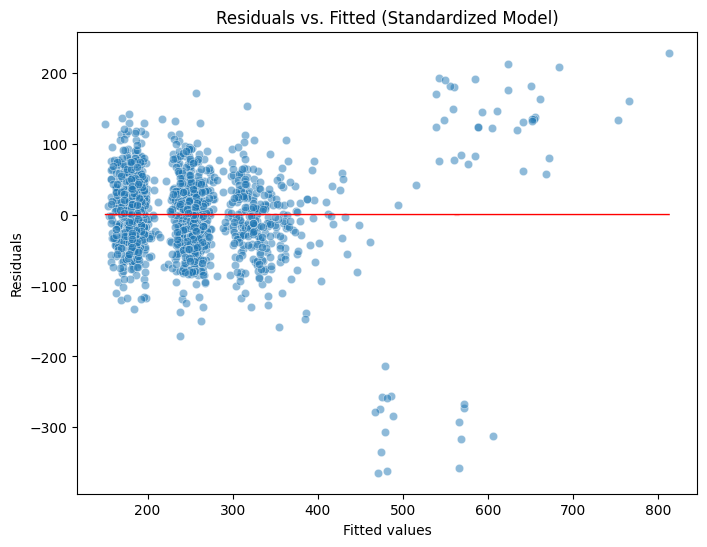

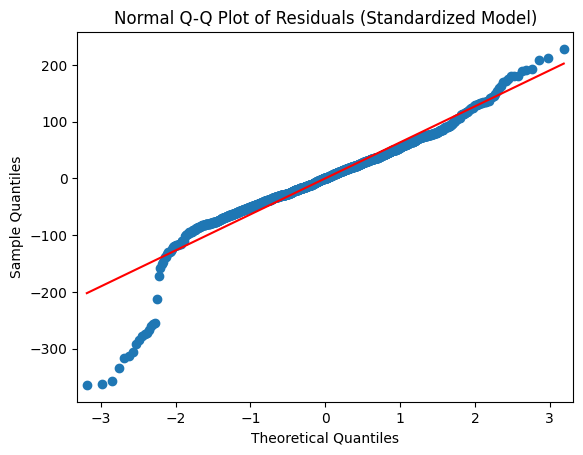

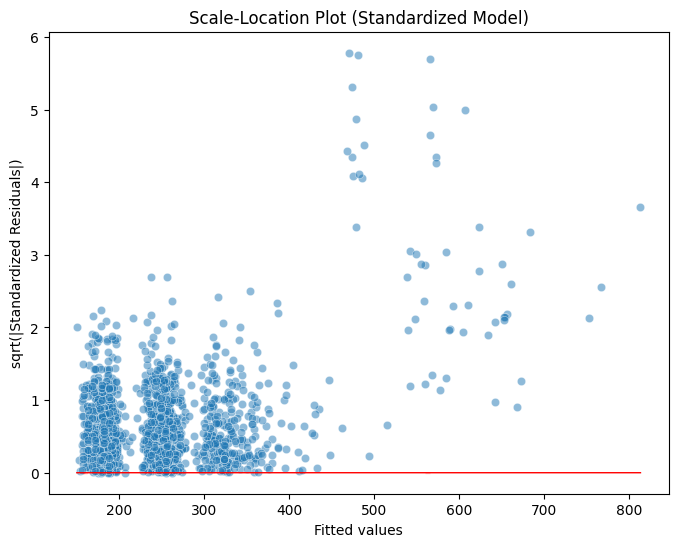

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

residuals_standardized = model_standardized.resid
fitted_standardized = model_standardized.fittedvalues

# Residuals vs. Fitted plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=fitted_standardized, y=residuals_standardized, alpha=0.5)
sns.lineplot(x=fitted_standardized, y=0, color='red', lw=1)  
plt.title('Residuals vs. Fitted (Standardized Model)')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

# QQ plot for normality of residuals
sm.qqplot(residuals_standardized, line='s')
plt.title('Normal Q-Q Plot of Residuals (Standardized Model)')
plt.show()

# Scale-location plot (Squared residuals vs. Fitted values)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=fitted_standardized, y=abs(model_standardized.get_influence().resid_studentized_internal), alpha=0.5)
sns.lineplot(x=fitted_standardized, y=0, color='red', lw=1)  # Adding a horizontal line at 0
plt.title('Scale-Location Plot (Standardized Model)')
plt.xlabel('Fitted values')
plt.ylabel('sqrt(|Standardized Residuals|)')
plt.show()


## Residual Plot for Model with Interaction Terms

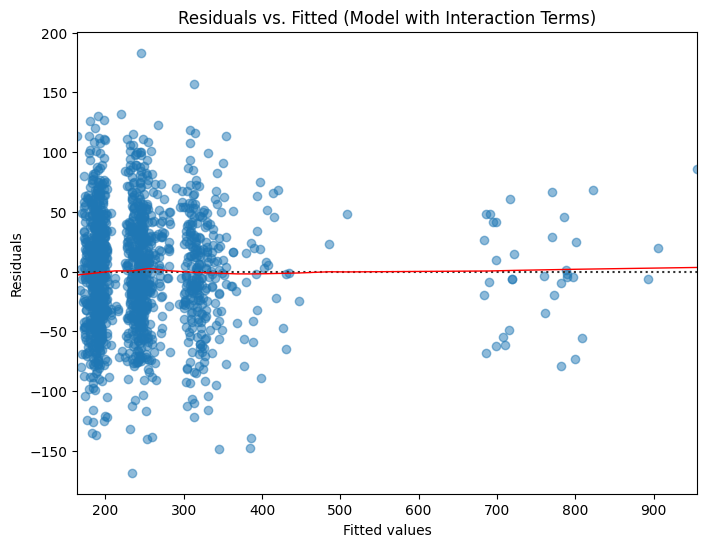

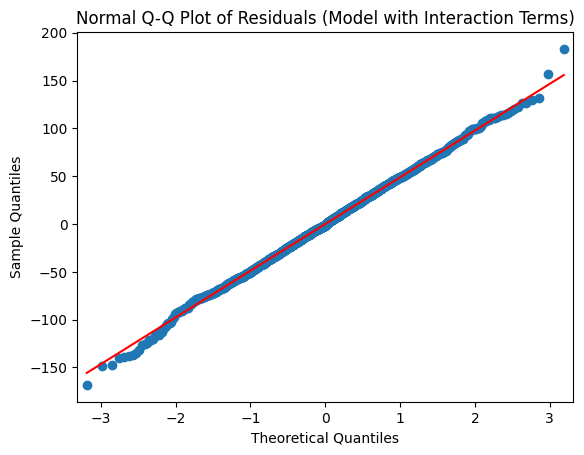

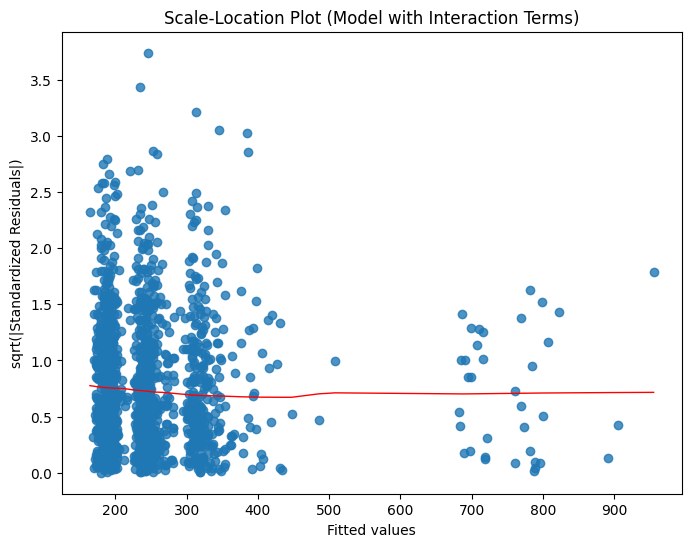

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Assuming model_interactions is your regression model with interaction terms
# Obtain residuals and fitted values
residuals_interactions = model_interactions.resid
fitted_interactions = model_interactions.fittedvalues

# Residuals vs. Fitted plot
plt.figure(figsize=(8, 6))
sns.residplot(x=fitted_interactions, y=residuals_interactions, lowess=True,
              scatter_kws={'alpha': 0.5}, line_kws={'color': 'red', 'lw': 1})
plt.title('Residuals vs. Fitted (Model with Interaction Terms)')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

# QQ plot for normality of residuals
sm.qqplot(residuals_interactions, line='s')
plt.title('Normal Q-Q Plot of Residuals (Model with Interaction Terms)')
plt.show()

# Scale-location plot (Squared residuals vs. Fitted values)
plt.figure(figsize=(8, 6))
sns.regplot(x=fitted_interactions, y=abs(model_interactions.get_influence().resid_studentized_internal),
            scatter=True, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.title('Scale-Location Plot (Model with Interaction Terms)')
plt.xlabel('Fitted values')
plt.ylabel('sqrt(|Standardized Residuals|)')
plt.show()
